# Calculate remaining budget under old and new TCR assumptions

1. takes the TCR from the paper
2. multiplies it by the airborne fraction from Arora et al from C4MIP models,
3. and then again by the mass of carbon dioxide relating to a doubling of CO2 
4. to get the TCRE 
5. which then feeds into the remaining carbon budget – and from this we can apply the recent framework of Matthews et al. 2021
6. sample all the ranges probabilistically

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scipy.stats as st
from scipy.optimize import root

In [2]:
models = {
    'UKESM1-0-LL'  :  np.array([0.57,   2.79,   3.151564051]),
    'ACCESS-ESM1-5':  np.array([0.56,   np.nan, np.nan]),
    'GFDL-ESM4'    :  np.array([0.54,   np.nan, np.nan]),
    'CESM2'        :  np.array([0.56,   2.00,   2.4221913614]),
    'NorESM2-LM'   :  np.array([0.55,   1.50,   2.132342201]),
    'IPSL-CM6A-LR' :  np.array([0.54,   2.41,   2.126937806]),
    'CNRM-ESM2-1'  :  np.array([0.53,   1.83,   1.92757286]),
    'MPI-ESM1-2-LR':  np.array([0.53,   1.63,   1.689231817]),
    'MIROC-ES2L'   :  np.array([0.52,   1.48,   1.6086641]),
    'CanESM5'      :  np.array([0.49,   2.73,   3.209215275]),
    'BCC-CSM2-MR'  :  np.array([0.46,   1.36,   1.624600902]),
}

In [3]:
df = pd.DataFrame(models).T
df.columns = ['airborne_fraction', 'TCR_old', 'TCR_new']
df

,airborne_fraction,TCR_old,TCR_new
UKESM1-0-LL,0.57,2.79,3.151564
ACCESS-ESM1-5,0.56,NaN,NaN
GFDL-ESM4,0.54,NaN,NaN
CESM2,0.56,2.00,2.422191
NorESM2-LM,0.55,1.50,2.132342
IPSL-CM6A-LR,0.54,2.41,2.126938
CNRM-ESM2-1,0.53,1.83,1.927573
MPI-ESM1-2-LR,0.53,1.63,1.689232
MIROC-ES2L,0.52,1.48,1.608664
CanESM5,0.49,2.73,3.209215


In [4]:
doubleCO2_TtC = 284.32 * 2.124 / 1000
doubleCO2_TtC
# ppm * GtC / ppm = GtC then divide 1000 to get TtC
# this is how much carbon is added into the atmospheric pool for a CO2 doubling
# Sources: 284.32 ppm in 1850: Meinshausen et al., 2017 https://gmd.copernicus.org/articles/10/2057/2017/gmd-10-2057-2017.pdf
#   (piControl concentrations for running CMIP6 models)
# 2.124 GtC / ppm atmospheric CO2 increase; Friedlingstein et al. 2020 https://essd.copernicus.org/articles/12/3269/2020/

0.6038956799999999

In [5]:
# TCRE in K / TtC = AF * TCR (K) / increase in atmospheric carbon (TtC)
df['TCRE_old'] = df['airborne_fraction'] * df['TCR_old'] / doubleCO2_TtC
df['TCRE_new'] = df['airborne_fraction'] * df['TCR_new'] / doubleCO2_TtC
df

,airborne_fraction,TCR_old,TCR_new,TCRE_old,TCRE_new
UKESM1-0-LL,0.57,2.79,3.151564,2.633402,2.974672
ACCESS-ESM1-5,0.56,NaN,NaN,NaN,NaN
GFDL-ESM4,0.54,NaN,NaN,NaN,NaN
CESM2,0.56,2.00,2.422191,1.854625,2.246128
NorESM2-LM,0.55,1.50,2.132342,1.366130,1.942038
IPSL-CM6A-LR,0.54,2.41,2.126938,2.155008,1.901895
CNRM-ESM2-1,0.53,1.83,1.927573,1.606072,1.691705
MPI-ESM1-2-LR,0.53,1.63,1.689232,1.430545,1.482529
MIROC-ES2L,0.52,1.48,1.608664,1.274392,1.385182
CanESM5,0.49,2.73,3.209215,2.215118,2.603952


<div role="main" id="content">
    <div class="container cleared container-type-article" data-container-type="article">
        <div class="u-container u-mt-32 u-mb-32 u-clearfix" data-component="article-container" data-track-component="table">
            <header><h1 class="c-article-table-title u-h1" id="table-1-title">Table 1 Description of parameters and their ranges used in Eq. (<a data-track="click" data-track-label="link" data-track-action="equation anchor" href="/articles/s43247-020-00064-9#Equ3">3</a>) to generate distributions of the remaining carbon budget (see ‘Methods' section and Supplementary Tables <a data-track="click" data-track-label="link" data-track-action="supplementary material anchor" href="/articles/s43247-020-00064-9#MOESM1">S1</a> and <a data-track="click" data-track-label="link" data-track-action="supplementary material anchor" href="/articles/s43247-020-00064-9#MOESM1">S2</a>).</h1><p class="c-article-table-subtitle">From: <a data-test="subtitle" data-track="click" data-track-action="back to article" data-track-category="table" data-track-label="link" href="/articles/s43247-020-00064-9">An integrated approach to quantifying uncertainties in the remaining carbon budget</a></p></header><div class="c-article-table-container"><div class="c-article-table-border c-table-scroll-wrapper"><div class="c-table-scroll-wrapper__content" data-component-scroll-wrapper=""><table class="data last-table"><thead class="c-article-table-head"><tr><th class="u-text-left ">
                        Parameter
                      </th><th class="u-text-left ">
                        Description
                      </th><th class="u-text-left ">
                        Main case values
                      </th></tr></thead><tbody><tr><td class="u-text-left ">
                        <span class="mathjax-tex">\(\Delta T_{anth}\)</span>
                      </td><td class="u-text-left ">
                        Anthropogenic warming in the year 2019 (with respect to the 1850–1900 baseline, as in SR1.5)
                      </td><td class="u-text-left ">
                        Median: 1.18 °C<br />
                        5–95% range: 1.05–1.41 °C
                      </td></tr><tr><td class="u-text-left ">
                        <i>E</i>
                      </td><td class="u-text-left ">
                        Cumulative CO<sub>2</sub> emissions from fossil fuels and land use (from 1870 to the end of 2019)
                      </td><td class="u-text-left ">
                        Median: 2350 GtCO<sub>2</sub><br />
                        5–95% range: 1960–2745 GtCO<sub>2</sub>
                      </td></tr><tr><td class="u-text-left ">
                        <span class="mathjax-tex">\(f_{nc}\)</span>
                      </td><td class="u-text-left ">
                        Historical non-CO<sub>2</sub> forcing fraction (mean ratio of non-CO<sub>2</sub> to total anthropogenic radiative forcing for 1990–2019)
                      </td><td class="u-text-left ">
                        Median value: 0.14, 5–95% range: −0.11 to 0.33
                      </td></tr><tr><td class="u-text-left ">
                        <span class="mathjax-tex">\(f_{nc}^ \ast\)</span>
                      </td><td class="u-text-left ">
                        Future non-CO<sub>2</sub> forcing fraction (mean ratio of non-CO<sub>2</sub> to total anthropogenic radiative forcing for 30 years prior to the year of net-zero CO<sub>2</sub> emissions in each scenario).
                      </td><td class="u-text-left ">
                        Treated as a linear function <span class="mathjax-tex">\(f_{nc}^ \ast\)</span> = 0.3081<span class="mathjax-tex">\(f_{nc}\)</span> + 0.14 + offset based on the regression line shown in Fig. <a data-track="click" data-track-label="link" data-track-action="figure anchor" href="/articles/s43247-020-00064-9#Fig3">3</a> with a constant offset of 0 (main case), or ±0.05 (reflecting the 5–95th range across all scenarios)
                      </td></tr><tr><td class="u-text-left ">
                        <span class="mathjax-tex">\(\Delta T_{ZEC}\)</span>
                      </td><td class="u-text-left ">
                        Zero-Emission Commitment (temperature increase or decrease 50 years after zero emissions from the point that total emissions reach 2750 or 3670 GtCO<sub>2</sub> in the 1% per year CO<sub>2</sub> increase scenario)
                      </td><td class="u-text-left ">
                        Median: 0 °C 5–95% range: −0.30 to 0.30 °C
                      </td></tr><tr><td class="u-text-left ">
                        <span class="mathjax-tex">\(\Delta T_{lim}\)</span>
                      </td><td class="u-text-left ">
                        Global mean warming target (human-induced warming, free from influences of forced or unforced natural climate variability)<sup><a data-track="click" data-track-action="reference anchor" data-track-label="link" data-test="citation-ref" aria-label="Reference 27" title="Rogelj, J., Schleussner, C.-F. &amp; Hare, W. Getting it right matters: temperature goal interpretations in geoscience research. Geophys. Res. Lett. 44, 10, 662–10, 665 (2017)." href="/articles/s43247-020-00064-9#ref-CR27" id="ref-link-section-d10688e1274">27</a>,<a data-track="click" data-track-action="reference anchor" data-track-label="link" data-test="citation-ref" aria-label="Reference 28" title="Schleussner, C.-F. et al. Science and policy characteristics of the Paris Agreement temperature goal. Nat. Clim. Change 6, 827–835 (2016)." href="/articles/s43247-020-00064-9#ref-CR28" id="ref-link-section-d10688e1277">28</a></sup>
                      </td><td class="u-text-left ">
                        1.5 °C (or 1.75 °C and 2.0 °C in <a data-track="click" data-track-label="link" data-track-action="supplementary material anchor" href="/articles/s43247-020-00064-9#MOESM1">Supplementary Material</a>)
                      </td></tr></tbody></table></div></div></div><div class="u-text-right"><a class="c-article__pill-button" data-track="click" data-track-action="back to article" data-track-category="table" data-track-label="button" href="/articles/s43247-020-00064-9#Tab1"><span>Back to article page</span><svg width="16" height="16" class="u-icon"><use xmlns:xlink="http://www.w3.org/1999/xlink" xlink:href="#global-icon-chevron-right"></use></svg></a></div>
        </div>
    </div>
</div>

$RCB = \frac{\Delta T_{lim} \left(1-f^*_{nc}\right) - \Delta T_{anth} \left(1-f_{nc}\right)}{TCRE}$

In [6]:
# try some sample values
T_lim = 1.5
T_anth = 1.18
f_nc = 0.14
f_nc_star = 0.3081*f_nc + 0.14

In [7]:
def rcb(T_lim, T_anth, f_nc, TCRE, offset=0):
    # results are GtCO2 remaining carbon budget
    f_nc_star = 0.3081*f_nc + 0.14 + offset
    return (T_lim*(1-f_nc_star) - T_anth*(1-f_nc))/TCRE * 1000 * 3.664

In [8]:
rcb(T_lim, T_anth, f_nc, 2)

385.634168

## Sample distributions of the parameters from Matthews and TCR from paper

In [9]:
data_df = pd.read_excel('../data/TCR_Chris.xlsx', engine='openpyxl', skipfooter=10)
data_df.set_index('Model', inplace=True)
#data_df.drop(['Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10'], axis=1, inplace=True)
tcr_obs_mean = data_df.loc['Observation', 'TCR_est']
tcr_obs_std = data_df.loc['Observation', 'TCR.std_est']
data_df.drop(['Observation'], axis=0, inplace=True)
data_df

,TCR_est,TCR.std_est,CI_L_est,CI_U_est,TCR_rep,CI_L_rep,CI_U_rep
Model,,,,,,,
BCC-CSM2-MR,1.624601,0.202996,1.236776,2.032519,1.36,1.23,1.45
BCC-ESM1,2.090836,0.303028,1.514116,2.701985,1.77,1.65,1.85
CAMS-CSM1-0,1.217036,0.209359,0.818765,1.639454,1.73,1.63,1.82
CanESM5,3.209215,0.364040,2.514628,3.941664,2.73,2.54,2.83
CESM2,2.422191,0.246391,1.951427,2.917278,2.00,1.89,2.07
CESM2-WACCM,2.483643,0.362309,1.792529,3.212780,1.93,1.79,2.03
CNRM-CM6-1,2.017492,0.198062,1.639023,2.415427,2.23,2.08,2.35
CNRM-ESM2-1,1.927573,0.340238,1.278657,2.612391,1.83,1.71,1.91
E3SM-1-0,2.544615,0.456726,1.672877,3.463243,2.90,2.76,2.99


In [10]:
print(tcr_obs_mean)
print(tcr_obs_std)

2.311045766
0.183200816


In [11]:
tcr_sherwood_mean = 1.85
tcr_sherwood_std = 0.35

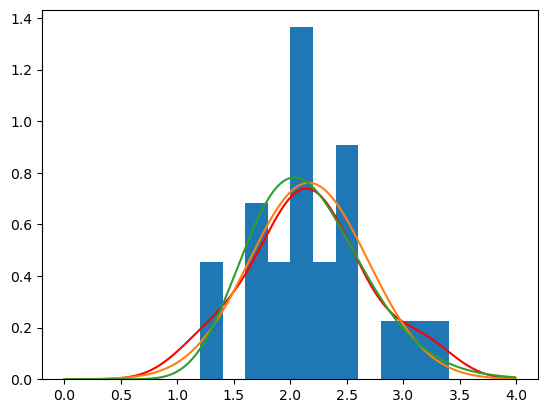

In [12]:
tcr_est = data_df['TCR_est'].values
tcr_est_kde = st.gaussian_kde(tcr_est)
pl.hist(tcr_est, bins=np.arange(1,3.5,0.2), density=True);
pl.plot(np.arange(0,4,0.01), tcr_est_kde(np.arange(0,4,0.01)), color='r')
pl.plot(np.arange(0,4,0.01), st.norm.pdf(np.arange(0,4,0.01), loc=tcr_est.mean(), scale=tcr_est.std(ddof=1)))
gamfit_est = st.gamma.fit(tcr_est, floc=0)
pl.plot(np.arange(0,4,0.01), st.gamma.pdf(np.arange(0,4,0.01), gamfit_est[0], gamfit_est[1], gamfit_est[2]))
#f_nc = f_nc_kde.resample(size=SAMPLES, seed=26109901).squeeze()

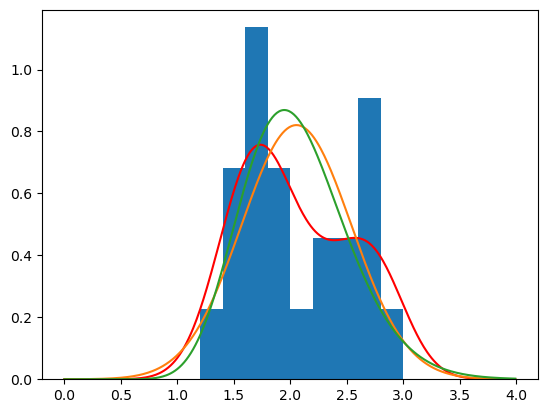

In [13]:
tcr_rep = data_df['TCR_rep'].values
tcr_rep_kde = st.gaussian_kde(tcr_rep)
pl.hist(tcr_rep, bins=np.arange(1,3.5,0.2), density=True);
pl.plot(np.arange(0,4,0.01), tcr_rep_kde(np.arange(0,4,0.01)), color='r')
pl.plot(np.arange(0,4,0.01), st.norm.pdf(np.arange(0,4,0.01), loc=tcr_rep.mean(), scale=tcr_rep.std(ddof=1)))
gamfit_rep = st.gamma.fit(tcr_rep, floc=0)
pl.plot(np.arange(0,4,0.01), st.gamma.pdf(np.arange(0,4,0.01), gamfit_rep[0], gamfit_rep[1], gamfit_rep[2]))

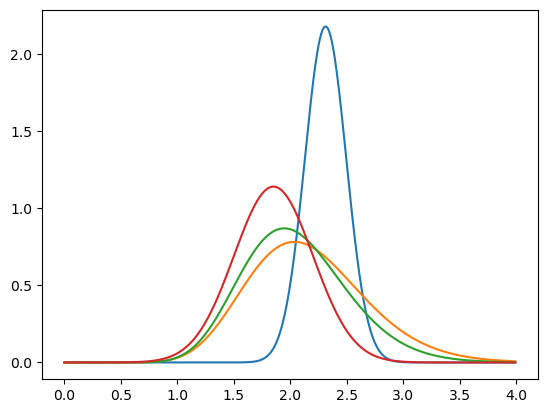

In [14]:
pl.plot(np.arange(0,4,0.01), st.norm.pdf(np.arange(0,4,0.01), loc=tcr_obs_mean, scale=tcr_obs_std))
pl.plot(np.arange(0,4,0.01), st.gamma.pdf(np.arange(0,4,0.01), gamfit_est[0], loc=gamfit_est[1], scale=gamfit_est[2]))
pl.plot(np.arange(0,4,0.01), st.gamma.pdf(np.arange(0,4,0.01), gamfit_rep[0], loc=gamfit_rep[1], scale=gamfit_rep[2]))
pl.plot(np.arange(0,4,0.01), st.norm.pdf(np.arange(0,4,0.01), loc=tcr_sherwood_mean, scale=tcr_sherwood_std))

In [15]:
print(df['airborne_fraction'].mean())
print(df['airborne_fraction'].std(ddof=1))

0.5318181818181819
0.03250174820472949


In [16]:
Z95 = st.norm.ppf(0.95)
SAMPLES = 1000000
tcr_obs = st.norm.rvs(size=SAMPLES, loc=tcr_obs_mean, scale=tcr_obs_std, random_state=524243801)
tcr_est = st.gamma.rvs(gamfit_est[0], size=SAMPLES, loc=gamfit_est[1], scale=gamfit_est[2], random_state=36193123)
tcr_rep = st.gamma.rvs(gamfit_rep[0], size=SAMPLES, loc=gamfit_rep[1], scale=gamfit_rep[2], random_state=3846319)
tcr_s20 = st.norm.rvs(size=SAMPLES, loc=tcr_sherwood_mean, scale=tcr_sherwood_std, random_state=218096016)

airborne_fraction = st.norm.rvs(size=SAMPLES, loc=df['airborne_fraction'].mean(), scale=df['airborne_fraction'].std(ddof=1), random_state=21393910)
offset = st.norm.rvs(size=SAMPLES, loc=0, scale=0.05/Z95, random_state=582942510)

In [17]:
tcre_obs = airborne_fraction * tcr_obs / doubleCO2_TtC
tcre_est = airborne_fraction * tcr_est / doubleCO2_TtC
tcre_rep = airborne_fraction * tcr_rep / doubleCO2_TtC
tcre_s20 = airborne_fraction * tcr_s20 / doubleCO2_TtC
print(np.percentile(tcre_obs/3.664, (5,50,95)))
print(np.percentile(tcre_est/3.664, (5,50,95)))
print(np.percentile(tcre_rep/3.664, (5,50,95)))
print(np.percentile(tcre_s20/3.664, (5,50,95)))

[0.46618055 0.554162   0.64933676]
[0.32691927 0.50816774 0.75110331]
[0.31900941 0.48362926 0.70061311]
[0.30186092 0.44302094 0.59268331]


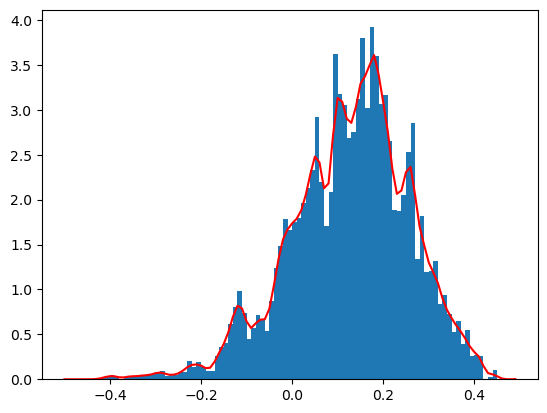

In [18]:
# Check against histogram in Matthews et al 2021 fig 3a
f_nc_df=pd.read_csv('../data/f_nc2019.csv', index_col=0) # move
f_nc_flat = f_nc_df.values.flatten()
f_nc_flat = f_nc_flat[~np.isnan(f_nc_flat)]
f_nc_kde = st.gaussian_kde(f_nc_flat)
pl.hist(f_nc_flat, bins=np.arange(-0.5,0.5,0.01), density=True);
pl.plot(np.arange(-0.5,0.5,0.01), f_nc_kde(np.arange(-0.5,0.5,0.01)), color='r')
f_nc = f_nc_kde.resample(size=SAMPLES, seed=26109901).squeeze()

In [19]:
f_nc_flat.mean()
print(np.median(f_nc_flat))
print(np.percentile(f_nc_flat, (5,95)))

0.1401406377553939
[-0.11153548  0.32855591]


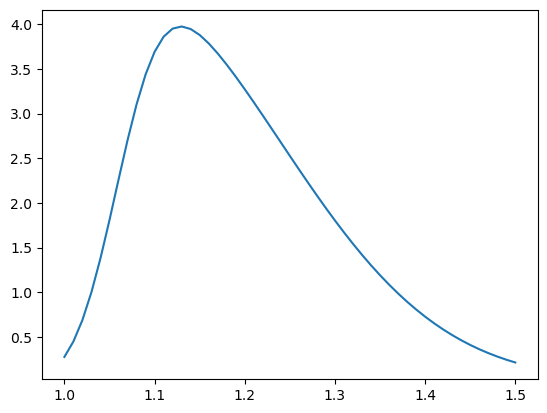

In [20]:
# anthropogenic warming calculation could use my AR6 numbers, instead we'll distribution fit to Matthews
warming_pc05 = 1.05
warming_pc50 = 1.18
warming_pc95 = 1.41

def fit_skewnorm(x):
    q05,q50,q95 = st.skewnorm.ppf((0.05,0.50,0.95), x[0], loc=x[1], scale=x[2])
    return [q05 - warming_pc05, q50 - warming_pc50, q95 - warming_pc95]

params = root(fit_skewnorm, [4, 1.18, 0.1]).x
#params
pl.plot(np.arange(1,1.51,0.01), st.skewnorm.pdf(np.arange(1,1.51,0.01), params[0], loc=params[1], scale=params[2]));
T_anth = st.skewnorm.rvs(params[0], loc=params[1], scale=params[2], size=SAMPLES)

In [21]:
rcb_obs = rcb(1.5, T_anth, f_nc, tcre_obs, offset=offset)
rcb_est = rcb(1.5, T_anth, f_nc, tcre_est, offset=offset)
rcb_rep = rcb(1.5, T_anth, f_nc, tcre_rep, offset=offset)
rcb_s20 = rcb(1.5, T_anth, f_nc, tcre_s20, offset=offset)
print(np.percentile(rcb_obs, (5,33,50,67,95)))
print(np.percentile(rcb_est, (5,33,50,67,95)))
print(np.percentile(rcb_rep, (5,33,50,67,95)))
print(np.percentile(rcb_s20, (5,33,50,67,95)))

[-140.08029178  246.57068469  362.20459213  468.45809863  732.07815049]
[-152.42978282  259.73140455  385.28821946  510.16398765  898.98122064]
[-160.39586161  273.88040982  406.09531698  535.85804641  932.74363436]
[-176.31869082  305.21242274  450.55548399  590.15172365  999.14153504]


In [22]:
rcb_obs_kde = st.gaussian_kde(rcb_obs)
rcb_est_kde = st.gaussian_kde(rcb_est)
rcb_rep_kde = st.gaussian_kde(rcb_rep)
rcb_s20_kde = st.gaussian_kde(rcb_s20)

In [23]:
# probability of already > 1.5C
print(rcb_obs_kde.integrate_box_1d(-np.inf, 0))
print(rcb_est_kde.integrate_box_1d(-np.inf, 0))
print(rcb_rep_kde.integrate_box_1d(-np.inf, 0))
print(rcb_s20_kde.integrate_box_1d(-np.inf, 0))

0.10670465740577967
0.10684201297686213
0.1068113249828426
0.10677834814981911


In [24]:
# set figure style
pl.rcParams['figure.figsize'] = (8.9/2.54, 8.9/2.54)
pl.rcParams['font.size'] = 7
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.top'] = True
pl.rcParams['ytick.right'] = True
pl.rcParams['xtick.direction'] = 'in'
pl.rcParams['ytick.direction'] = 'in'
pl.rcParams['xtick.minor.visible'] = True
pl.rcParams['ytick.minor.visible'] = True
pl.rcParams['figure.dpi'] = 300
pl.rcParams['axes.axisbelow'] = False

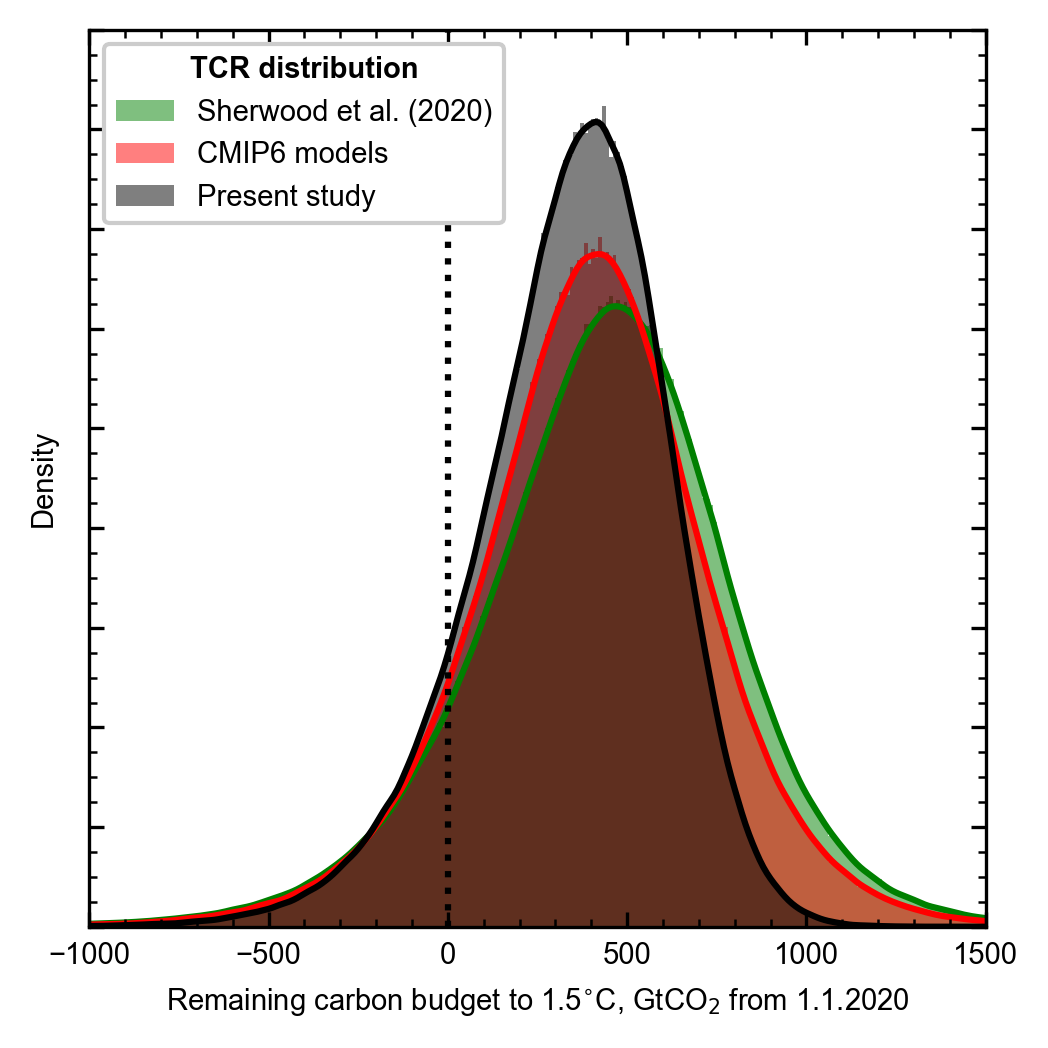

In [25]:
limits = np.arange(-1000, 1501, 10)
kde_limits = np.arange(-1000, 1501, 10)

fig, ax = pl.subplots()

ax.hist(rcb_s20, density=True, alpha=0.5, bins=limits, label='Sherwood et al. (2020)', color='g', linewidth=0);
ax.hist(rcb_rep, density=True, alpha=0.5, bins=limits, label='CMIP6 models', color='r', linewidth=0);
#ax.hist(rcb_est, density=True, alpha=0.5, bins=limits, label='CMIP6 estimated TCR', color='b', linewidth=0)
ax.hist(rcb_obs, density=True, alpha=0.5, bins=limits, label='Present study', color='k', linewidth=0);
ax.plot(kde_limits, rcb_s20_kde(kde_limits), color='g')
ax.plot(kde_limits, rcb_rep_kde(kde_limits), color='r')
#ax.plot(kde_limits, rcb_est_kde(kde_limits), color='b')
ax.plot(kde_limits, rcb_obs_kde(kde_limits), color='k')
ax.axvline(0, ls=':', color='k')

ax.set_ylim(0, 0.0018)
ax.set_yticklabels([])
ax.set_xlim(limits[0], limits[-1])
ax.legend(framealpha=1, title='TCR distribution', title_fontproperties={'weight':'bold'})
ax.set_xlabel('Remaining carbon budget to 1.5$^{\circ}$C, GtCO$_2$ from 1.1.2020')
ax.set_ylabel('Density')
ax.set_title('')
pl.tight_layout()

pl.savefig('../figures/rcb.png')
pl.savefig('../figures/rcb.pdf')